In [44]:
import pandas as pd
import os
from env import get_db_url
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing




### Acquire and Summarize

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
sql = '''SELECT *
FROM properties_2017
JOIN predictions_2017 USING (parcelid)
LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
LEFT JOIN storytype USING (storytypeid)
LEFT JOIN unique_properties USING (parcelid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential'
AND predictions_2017.transactiondate LIKE '2017%%'
AND properties_2017.latitude IS NOT NULL
AND properties_2017.longitude IS NOT NULL;'''

df = pd.read_sql(sql, get_db_url('zillow'));

In [3]:
df.head()

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,censustractandblock,id,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,NaN,14297519,NaN,NaN,NaN,261.0,NaN,1727539,NaN,3.5,...,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None
1,NaN,17052889,NaN,NaN,NaN,261.0,NaN,1387261,NaN,1.0,...,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None
2,NaN,14186244,NaN,NaN,NaN,261.0,NaN,11677,NaN,2.0,...,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None
3,2.0,12177905,NaN,NaN,NaN,261.0,NaN,2288172,NaN,3.0,...,6.037300e+13,3,-0.103410,2017-01-01,None,Single Family Residential,None,None,None,Central
4,2.0,12095076,NaN,NaN,1.0,261.0,NaN,781532,NaN,3.0,...,6.037461e+13,6,-0.001011,2017-01-01,None,Single Family Residential,Central,None,None,Central


Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
df.shape

(52441, 68)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
heatingorsystemtypeid,33935.0,3.966288e+00,2.562506e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
parcelid,52441.0,1.299912e+07,3.411444e+06,1.071186e+07,1.151022e+07,1.257764e+07,1.412953e+07,1.676878e+08
storytypeid,47.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
typeconstructiontypeid,76.0,5.973684e+00,2.294157e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
airconditioningtypeid,13638.0,2.438041e+00,3.846176e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
propertylandusetypeid,52441.0,2.610000e+02,0.000000e+00,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
id,52441.0,1.497270e+06,8.594393e+05,3.490000e+02,7.579550e+05,1.500810e+06,2.241534e+06,2.982270e+06
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52441.0,2.299403e+00,1.022772e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heatingorsystemtypeid         33935 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        76 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   architecturalstyletypeid      70 non-null     float64
 7   id                            52441 non-null  int64  
 8   basementsqft                  47 non-null     float64
 9   bathroomcnt                   52441 non-null  float64
 10  bedroomcnt                    52441 non-null  float64
 11  buildingclasstypeid           0 non-null      object 
 12  buildingqualitytypeid         33740 non-null  float64
 13  c

In [7]:
df_num = df.select_dtypes(include='number')
df_num

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
0,NaN,14297519,NaN,NaN,NaN,261.0,NaN,1727539,NaN,3.5,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,6.059063e+13,0,0.025595
1,NaN,17052889,NaN,NaN,NaN,261.0,NaN,1387261,NaN,1.0,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,6.111001e+13,1,0.055619
2,NaN,14186244,NaN,NaN,NaN,261.0,NaN,11677,NaN,2.0,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,6.059022e+13,2,0.005383
3,2.0,12177905,NaN,NaN,NaN,261.0,NaN,2288172,NaN,3.0,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,6.037300e+13,3,-0.103410
4,2.0,12095076,NaN,NaN,1.0,261.0,NaN,781532,NaN,3.0,...,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,6.037461e+13,6,-0.001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2.0,12412492,NaN,NaN,NaN,261.0,NaN,2274245,NaN,2.0,...,NaN,125466.0,346534.0,2016.0,221068.0,4175.08,NaN,6.037555e+13,77607,0.001082
52437,2.0,11000655,NaN,NaN,NaN,261.0,NaN,673515,NaN,2.0,...,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,6.037101e+13,77609,0.020615
52438,NaN,17239384,NaN,NaN,NaN,261.0,NaN,2968375,NaN,2.0,...,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,6.111008e+13,77610,0.013209
52439,2.0,12773139,NaN,NaN,1.0,261.0,NaN,1843709,NaN,1.0,...,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,6.037434e+13,77611,0.037129


Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
def find_missing_values(df):
    column_name = []
    num_rows_missing = []
    pct_rows_missing = []

    for column in df.columns:       
        num_rows_missing.append(df[column].isna().sum())
        pct_rows_missing.append(df[column].isna().sum()/ len(df))
        column_name.append(column)
    data = {'column_name':column_name, 'num_rows_missing': num_rows_missing, 'pct_rows_missing': pct_rows_missing}
    return pd.DataFrame(data, index=None)


In [9]:
# call function and show dataframe
missing_values = find_missing_values(df)
missing_values.head()

,column_name,num_rows_missing,pct_rows_missing
0,heatingorsystemtypeid,18506,0.352892
1,parcelid,0,0.0
2,storytypeid,52394,0.999104
3,typeconstructiontypeid,52365,0.998551
4,airconditioningtypeid,38803,0.739936


In [10]:
# set index to column name so that erroneous value is not assigned to index
missing_values.set_index('column_name', inplace=True)

In [11]:
missing_values.head()

,num_rows_missing,pct_rows_missing
column_name,,
heatingorsystemtypeid,18506,0.352892
parcelid,0,0.0
storytypeid,52394,0.999104
typeconstructiontypeid,52365,0.998551
airconditioningtypeid,38803,0.739936


### Prepare

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

Completed during SQL query "Single Family Residential"

In [12]:
df.propertylandusedesc.value_counts()

Single Family Residential    52441
Name: propertylandusedesc, dtype: int64

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
hint:
Look up the dropna documentation.
You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [13]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [14]:
# drop values in rows and columns where 30% of data is missing
df = handle_missing_values(df, prop_required_column = .7, prop_required_row = .7)

In [15]:
df.shape

(52439, 30)

In [16]:
df.isna().sum()

parcelid                           0
propertylandusetypeid              0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                135
calculatedfinishedsquarefeet      80
finishedsquarefeet12             245
fips                               0
fullbathcnt                      135
latitude                           0
longitude                          0
lotsizesquarefeet                367
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1035
regionidcounty                     0
regionidzip                       24
roomcnt                            0
yearbuilt                        114
structuretaxvaluedollarcnt        82
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              121
id                                 0
l

# To Do: wrangle_zillow.py 

In [17]:
# drop rows with remaining null values 
df = df.dropna()

In [18]:
df.roomcnt.value_counts()

0.0     36514
6.0      3889
7.0      3540
8.0      2774
5.0      1817
9.0      1159
4.0       442
10.0      336
11.0      103
3.0        42
12.0       33
13.0        9
2.0         8
14.0        5
1.0         1
15.0        1
Name: roomcnt, dtype: int64

In [19]:
df.censustractandblock.value_counts()

6.037920e+13    32
6.059032e+13    24
6.059032e+13    23
6.059032e+13    22
6.037142e+13    22
                ..
6.059064e+13     1
6.037670e+13     1
6.111002e+13     1
6.037481e+13     1
6.037503e+13     1
Name: censustractandblock, Length: 30584, dtype: int64

In [20]:
df.fips.value_counts()

6037.0    32821
6059.0    13522
6111.0     4330
Name: fips, dtype: int64

In [21]:
# drop erroneous columns
df = df.drop(columns=['parcelid', 'propertylandusetypeid', 'id','calculatedbathnbr', 
       'finishedsquarefeet12', 'fullbathcnt', 'propertycountylandusecode',
       'rawcensustractandblock','regionidcounty', 'roomcnt', 'structuretaxvaluedollarcnt',
     'assessmentyear', 'landtaxvaluedollarcnt', 'censustractandblock', 'id'])

In [22]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,96978.0,1998.0,1023282.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,6488.30,0.005383,2017-01-01,Single Family Residential
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,1777.51,-0.103410,2017-01-01,Single Family Residential
4,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,47019.0,96293.0,1950.0,773303.0,9516.26,-0.001011,2017-01-01,Single Family Residential


Takeaways:
- id type columns bring no value
- calculatedfinishedsquarefeet is a duplicate to finsihedsquarefeet12
- bathroomcnt is more specific than fullbathcnt
- calculatedbathnbr only counts bathrooms
- roomcnt is mostly comprised of values of 0 and can be accounted for within bed and bathroomcnt
- taxvaluedollarcnt has similar information to landtax and structue taxvalues
- regionidcounty holds the same information as fips

In [23]:
def map_counties(df):
    # identified counties for fips codes 
    counties = {6037: 'los_angeles',
                6059: 'orange_county',
                6111: 'ventura'}
    # map counties to fips codes
    df.fips = df.fips.map(counties)
    return df

In [24]:
df = map_counties(df)

In [25]:
df.transactiondate.value_counts()

2017-06-30    780
2017-04-28    593
2017-05-31    550
2017-07-28    526
2017-08-31    514
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2017-09-25      1
Name: transactiondate, Length: 257, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathroomcnt'>

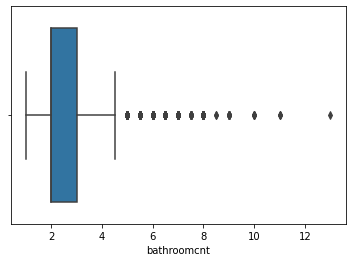

In [26]:
sns.boxplot(df.bathroomcnt)

In [27]:
def remove_outliers(df, k=1.5):
    ''' Take in a dataframe, k value, and specified columns within a dataframe 
    and then return the dataframe with outliers removed
    '''
    cols=['bathroomcnt',
	'bedroomcnt',
	'calculatedfinishedsquarefeet',
	'lotsizesquarefeet',
	'taxvaluedollarcnt',
    'yearbuilt',
	'taxamount']

    for col in cols:
        # Get quartiles
        q1, q3 = df[col].quantile([.25, .75]) 
        # Calculate interquartile range
        iqr = q3 - q1 
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


In [28]:
df.shape

(50673, 15)

In [29]:
df = remove_outliers(df,k=1.5)
df.shape

(38801, 15)

<AxesSubplot:xlabel='bathroomcnt'>

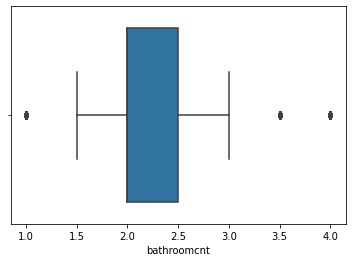

In [30]:
sns.boxplot(x=df.bathroomcnt)

<AxesSubplot:xlabel='bedroomcnt'>

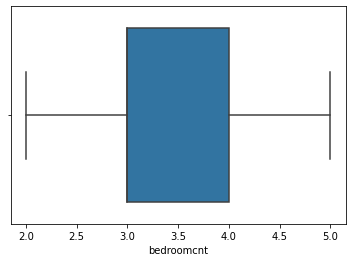

In [31]:
sns.boxplot(x=df.bedroomcnt)

<AxesSubplot:xlabel='taxvaluedollarcnt'>

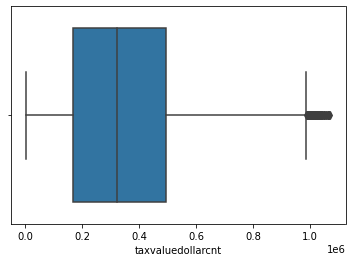

In [32]:
sns.boxplot(x=df.taxvaluedollarcnt)

In [33]:
df.taxvaluedollarcnt.max(), df.taxvaluedollarcnt.min()

(1070530.0, 3254.0)

<AxesSubplot:xlabel='lotsizesquarefeet'>

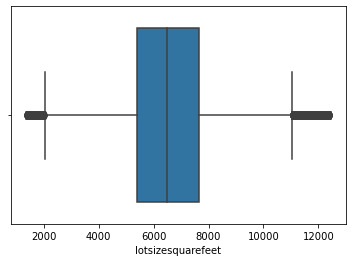

In [34]:
sns.boxplot(x=df.lotsizesquarefeet)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

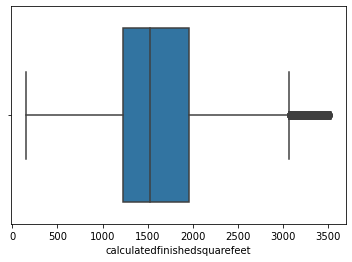

In [35]:
sns.boxplot(x=df.calculatedfinishedsquarefeet)

<AxesSubplot:xlabel='yearbuilt'>

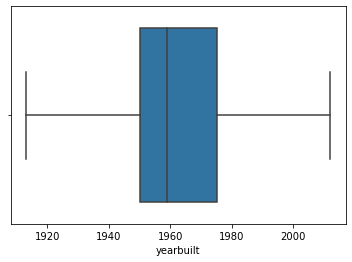

In [36]:
sns.boxplot(x=df.yearbuilt)

In [37]:
df.yearbuilt.median()

1959.0

In [38]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity',
       'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'logerror', 'transactiondate', 'propertylandusedesc'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38801 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   38801 non-null  float64
 1   bedroomcnt                    38801 non-null  float64
 2   calculatedfinishedsquarefeet  38801 non-null  float64
 3   fips                          38801 non-null  object 
 4   latitude                      38801 non-null  float64
 5   longitude                     38801 non-null  float64
 6   lotsizesquarefeet             38801 non-null  float64
 7   regionidcity                  38801 non-null  float64
 8   regionidzip                   38801 non-null  float64
 9   yearbuilt                     38801 non-null  float64
 10  taxvaluedollarcnt             38801 non-null  float64
 11  taxamount                     38801 non-null  float64
 12  logerror                      38801 non-null  float64
 13  t

# Move to exploration notebook

In [40]:
df['month'] = pd.DatetimeIndex(df['transactiondate']).month

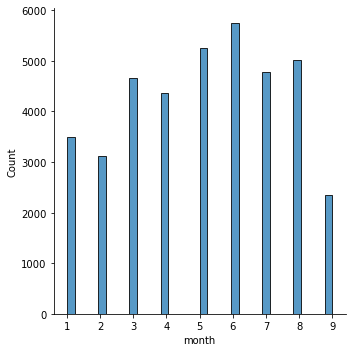

In [41]:
sns.displot(df.month)

In [42]:
 df[df.yearbuilt > 1959]

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,month
0,3.5,4.0,3100.0,orange_county,33634931.0,-117869207.0,4506.0,53571.0,96978.0,1998.0,1023282.0,11013.72,0.025595,2017-01-01,Single Family Residential,1
2,2.0,3.0,1243.0,orange_county,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,6488.30,0.005383,2017-01-01,Single Family Residential,1
7,3.0,4.0,2540.0,los_angeles,34434971.0,-118464390.0,10384.0,54311.0,96374.0,1999.0,430108.0,6103.36,0.005963,2017-01-02,Single Family Residential,1
9,2.5,3.0,1371.0,ventura,34238229.0,-119170633.0,3445.0,13150.0,97107.0,2004.0,198054.0,2204.84,0.008669,2017-01-02,Single Family Residential,1
10,2.0,4.0,1677.0,orange_county,33642800.0,-117707211.0,5304.0,32380.0,96962.0,1981.0,528847.0,5496.44,-0.021896,2017-01-02,Single Family Residential,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52416,2.0,3.0,1155.0,los_angeles,34030990.0,-117888768.0,6020.0,34636.0,96525.0,1977.0,315462.0,4277.68,0.009890,2017-09-19,Single Family Residential,9
52418,3.0,4.0,1859.0,los_angeles,34020210.0,-117873372.0,7227.0,34636.0,96522.0,1978.0,374886.0,4957.87,0.020421,2017-09-19,Single Family Residential,9
52434,3.0,4.0,2068.0,los_angeles,34075094.0,-117773759.0,7333.0,20008.0,96508.0,1967.0,332251.0,4225.84,0.319408,2017-09-19,Single Family Residential,9
52436,2.0,4.0,1633.0,los_angeles,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,4175.08,0.001082,2017-09-19,Single Family Residential,9
